# carregamento de modulos

In [2]:
import pandas as pd
from matplotlib import pyplot as plt

In [3]:
data = r"https://raw.githubusercontent.com/Walter-Alves-602/Spaceship-Titanic/refs/heads/main/train.csv"
df = pd.read_csv(data)

In [4]:
df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


# regeneração de dados

In [5]:
df['Destination'].unique()

array(['TRAPPIST-1e', 'PSO J318.5-22', '55 Cancri e', nan], dtype=object)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


> vamos separar uma coluna para os grupos de pessoas, isso pode ser usado para regenerar dados perdidos

In [7]:
df["Group"] = df["PassengerId"].apply(lambda x: int(x.split("_")[0]))

In [8]:
df['Group'].value_counts()

Group
4256    8
5133    8
8956    8
8168    8
984     8
       ..
3469    1
3468    1
3467    1
3465    1
3491    1
Name: count, Length: 6217, dtype: int64

In [9]:
df[df['Group'] == 9081]

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Group
8507,9081_01,Earth,False,G/1476/P,TRAPPIST-1e,8.0,False,0.0,0.0,0.0,0.0,0.0,Hanna Clemondsey,False,9081
8508,9081_02,Earth,False,F/1858/P,55 Cancri e,15.0,False,0.0,0.0,0.0,208.0,754.0,Willah Clemondsey,False,9081
8509,9081_03,Earth,True,NaN,TRAPPIST-1e,1.0,False,0.0,0.0,0.0,0.0,0.0,Beula Clemondsey,False,9081
8510,9081_04,Earth,False,G/1476/P,TRAPPIST-1e,9.0,False,0.0,0.0,0.0,0.0,0.0,NaN,True,9081
8511,9081_05,Earth,False,F/1858/P,TRAPPIST-1e,48.0,False,0.0,586.0,784.0,4.0,21.0,Haryn Clemondsey,True,9081
8512,9081_06,Earth,False,F/1858/P,PSO J318.5-22,16.0,NaN,0.0,0.0,761.0,0.0,0.0,Daryla Clemondsey,False,9081
8513,9081_07,Earth,True,G/1476/P,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Aliey Clemondsey,True,9081
8514,9081_08,Earth,True,G/1476/P,PSO J318.5-22,3.0,False,0.0,0.0,0.0,0.0,0.0,Virgie Clemondsey,True,9081


## separando cabine em posição

In [10]:
df[['deck', 'num', 'side']] = df['Cabin'].str.split('/', expand=True)
df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Group,deck,num,side
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,1,B,0,P
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,2,F,0,S
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,3,A,0,S
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,3,A,0,S
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,4,F,1,S


> notas-se que no mesmo grupo, Home planet, e Vip parecce ser o mesmo,

## regenerando VIP e HomePlanet por moda do grupo

In [11]:
df[['VIP', "Group","HomePlanet"]].groupby('Group').nunique().sort_values('VIP', ascending=False)

,VIP,HomePlanet
Group,,
7518,2,1
2257,2,1
6400,2,1
7498,2,1
4336,2,1
...,...,...
913,0,1
819,0,1
679,0,1


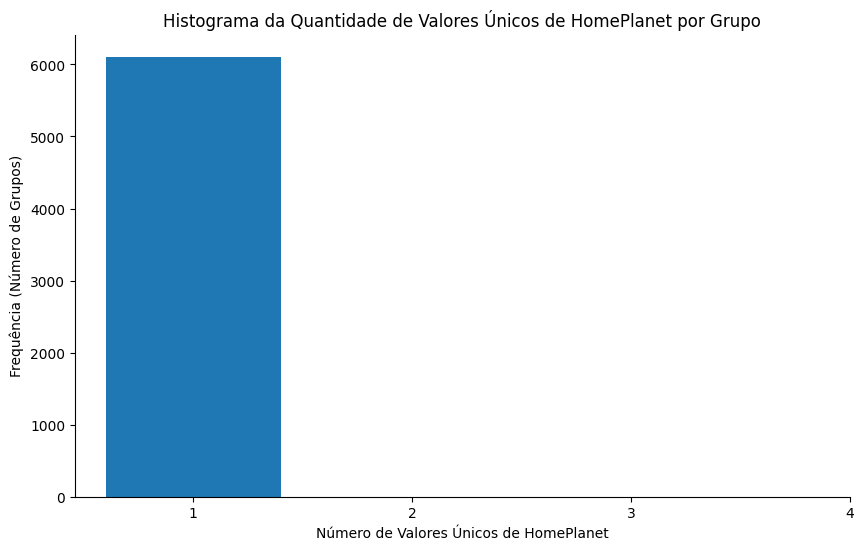

In [12]:
# Agrupar por 'Group' e contar valores únicos de 'HomePlanet'
unique_homeplanets_per_group = df.groupby('Group')['HomePlanet'].nunique()
# Plotar o histograma
plt.figure(figsize=(10, 6))
unique_homeplanets_per_group.plot(kind='hist', bins=range(1, 5), align='left', rwidth=0.8) # bins para 1, 2, 3, 4 valores únicos
plt.title('Histograma da Quantidade de Valores Únicos de HomePlanet por Grupo')
plt.xlabel('Número de Valores Únicos de HomePlanet')
plt.ylabel('Frequência (Número de Grupos)')
plt.xticks([1, 2, 3, 4]) # Mostrar ticks para os valores possíveis de unique HomePlanets
plt.gca().spines[['top', 'right']].set_visible(False)
plt.show()

> é possivel regenerar o estatus VIP e o planeta natal apartir dos dados do grupo

In [13]:
def fill_homeplanet_by_group_mode(row):
    if pd.isna(row['HomePlanet']):
        group_data = df[df['Group'] == row['Group']]
        # Calcula a moda, retorna o primeiro valor se houver múltiplos modos
        mode_value = group_data['HomePlanet'].mode()
        if not mode_value.empty:
            return mode_value[0]
    return row['HomePlanet']

# Aplicar a função para preencher os valores faltantes
df['HomePlanet'] = df.apply(fill_homeplanet_by_group_mode, axis=1)

# Verificar se ainda há valores faltantes em HomePlanet após o preenchimento por grupo
print("Valores faltantes em HomePlanet após preenchimento por grupo:")
print(df['HomePlanet'].isnull().sum())

# Para os valores que ainda podem estar faltando (grupos onde todos HomePlanet são NaN),
# podemos preencher com a moda global de HomePlanet ou outra estratégia.
# Aqui, vamos preencher o restante com a moda global
if df['HomePlanet'].isnull().sum() > 0:
    global_mode_homeplanet = df['HomePlanet'].mode()
    if not global_mode_homeplanet.empty:
        df['HomePlanet'].fillna(global_mode_homeplanet[0], inplace=True)
        print("\nValores faltantes restantes preenchidos com a moda global de HomePlanet.")

print("\nValores faltantes em HomePlanet após preenchimento global:")
print(df['HomePlanet'].isnull().sum())
df.info()

Valores faltantes em HomePlanet após preenchimento por grupo:
111

Valores faltantes restantes preenchidos com a moda global de HomePlanet.

Valores faltantes em HomePlanet após preenchimento global:
0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8693 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
 14

/tmp/ipykernel_24798/3680481212.py:23: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['HomePlanet'].fillna(global_mode_homeplanet[0], inplace=True)


In [14]:
def fill_VIP_by_group_mode(row):
    if pd.isna(row['VIP']):
        group_data = df[df['Group'] == row['Group']]
        # Calcula a moda, retorna o primeiro valor se houver múltiplos modos
        mode_value = group_data['VIP'].mode()
        if not mode_value.empty:
            return mode_value[0]
    return row['VIP']

# Aplicar a função para preencher os valores faltantes
df['VIP'] = df.apply(fill_VIP_by_group_mode, axis=1)

# Verificar se ainda há valores faltantes em VIP após o preenchimento por grupo
print("Valores faltantes em VIP após preenchimento por grupo:")
print(df['VIP'].isnull().sum())

# Para os valores que ainda podem estar faltando (grupos onde todos VIP são NaN),
# podemos preencher com a moda global de VIP ou outra estratégia.
# Aqui, vamos preencher o restante com a moda global
if df['VIP'].isnull().sum() > 0:
    global_mode_VIP = df['VIP'].mode()
    if not global_mode_VIP.empty:
        df['VIP'].fillna(global_mode_VIP[0], inplace=True)
        print("\nValores faltantes restantes preenchidos com a moda global de VIP.")

print("\nValores faltantes em VIP após preenchimento global:")
print(df['VIP'].isnull().sum())
df.info()

Valores faltantes em VIP após preenchimento por grupo:
116

Valores faltantes restantes preenchidos com a moda global de VIP.

Valores faltantes em VIP após preenchimento global:
0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8693 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8693 non-null   bool   
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
 14  Group         8693 

/tmp/ipykernel_24798/2735502876.py:23: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['VIP'].fillna(global_mode_VIP[0], inplace=True)
/tmp/ipykernel_24798/2735502876.py:23: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['VIP'].fillna(global_mode_VIP[0], inplace=True)


## placeholder

In [15]:
df.groupby('Cabin')['Cabin'].count().sort_values(ascending=False).head(5)

Cabin
G/734/S    8
G/109/P    7
D/176/S    7
B/11/S     7
C/137/S    7
Name: Cabin, dtype: int64

In [16]:
df[df['Cabin']=="G/734/S"]

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Group,deck,num,side
4221,4498_01,Earth,False,G/734/S,55 Cancri e,11.0,False,0.0,0.0,0.0,0.0,0.0,Valex Munozanson,False,4498,G,734,S
4222,4498_02,Earth,True,G/734/S,PSO J318.5-22,14.0,False,0.0,0.0,0.0,0.0,0.0,Loise Beckeetter,False,4498,G,734,S
4223,4498_03,Earth,True,G/734/S,PSO J318.5-22,4.0,False,0.0,0.0,0.0,0.0,0.0,Lorie Beckeetter,True,4498,G,734,S
4224,4498_04,Earth,False,G/734/S,TRAPPIST-1e,11.0,False,0.0,0.0,0.0,0.0,NaN,Dandy Munozanson,False,4498,G,734,S
4225,4498_05,Earth,True,G/734/S,TRAPPIST-1e,31.0,False,0.0,0.0,0.0,0.0,0.0,Karay Beckeetter,True,4498,G,734,S
4226,4498_06,Earth,False,G/734/S,TRAPPIST-1e,15.0,False,0.0,893.0,0.0,0.0,0.0,Line Munozanson,True,4498,G,734,S
4227,4498_07,Earth,False,G/734/S,TRAPPIST-1e,39.0,False,0.0,2.0,0.0,69.0,836.0,Dary Mallerez,False,4498,G,734,S
4228,4498_08,Earth,False,G/734/S,TRAPPIST-1e,7.0,False,0.0,0.0,0.0,0.0,0.0,Kendy Munozanson,False,4498,G,734,S


In [17]:
df[['Cabin', 'RoomService']].groupby('Cabin').sum().sort_values('Cabin').head(5)

,RoomService
Cabin,
A/0/P,0.0
A/0/S,43.0
A/1/S,279.0
A/10/P,0.0
A/10/S,2.0


## regeneração de valores numericos

In [18]:
df.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Group
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000,8693.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791,4633.389624
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189,2671.028856
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2319.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4630.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000,6883.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000,9280.000000


> possivelmente quem é vip virá a gastar mais, dividir o dataset em dois poderia me dar desvios padroes menores

In [19]:
df_VIP=df[df['VIP']==True]
df_notVIP = df[df['VIP']==False]

In [20]:
df_VIP.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Group
count,198.000000,195.000000,193.000000,194.000000,197.000000,195.000000,199.000000
mean,37.449495,473.615385,1811.393782,247.726804,760.710660,1234.856410,4870.834171
std,11.611957,1098.363713,3758.336442,587.449429,1622.153873,2453.060817,2774.941915
min,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
25%,29.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2457.000000
50%,34.000000,0.000000,287.000000,0.000000,39.000000,30.000000,4917.000000
75%,44.000000,528.500000,2191.000000,161.500000,843.000000,1377.500000,7498.000000
max,73.000000,8243.000000,29813.000000,3700.000000,13902.000000,12424.000000,9276.000000


In [21]:
df_notVIP.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Group
count,8316.000000,8317.000000,8317.000000,8291.000000,8313.000000,8310.000000,8494.000000
mean,28.622655,218.851268,426.672839,171.997708,300.484903,283.031649,4627.826701
std,14.488754,652.154158,1512.466562,605.020213,1120.611594,1087.291188,2668.462106
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2315.250000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4625.000000
75%,38.000000,43.000000,57.000000,25.000000,53.000000,40.000000,6865.750000
max,79.000000,14327.000000,27071.000000,23492.000000,22408.000000,24133.000000,9280.000000


> notas-se que ha uma diferença clara entre os valores de quem é vip e de quem não é vip

In [22]:
def prencher_mediana_seVIP(coluna):
    mediana_coluna_vip = df_VIP[coluna].median()
    mediana_coluna_notvip = df_notVIP[coluna].median()

    df[coluna] = df.apply(lambda row: mediana_coluna_vip if pd.isna(row[coluna]) and row['VIP'] == True
                                else (mediana_coluna_notvip if pd.isna(row[coluna]) and row['VIP'] == False
                                    else row[coluna]), axis=1)

In [23]:
colunas = ["RoomService", "FoodCourt", "ShoppingMall", "Spa", "VRDeck", "Age"]
for coluna in colunas:
    prencher_mediana_seVIP(coluna)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8693 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8693 non-null   float64
 6   VIP           8693 non-null   bool   
 7   RoomService   8693 non-null   float64
 8   FoodCourt     8693 non-null   float64
 9   ShoppingMall  8693 non-null   float64
 10  Spa           8693 non-null   float64
 11  VRDeck        8693 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
 14  Group         8693 non-null   int64  
 15  deck          8494 non-null   object 
 16  num           8494 non-null   object 
 17  side          8494 non-null   object 
dtypes: bool(2), float64(6), int6

In [25]:
df.isnull().sum()

PassengerId       0
HomePlanet        0
CryoSleep       217
Cabin           199
Destination     182
Age               0
VIP               0
RoomService       0
FoodCourt         0
ShoppingMall      0
Spa               0
VRDeck            0
Name            200
Transported       0
Group             0
deck            199
num             199
side            199
dtype: int64

## regenerando CryoSleep

In [26]:
categorical_cols = ['HomePlanet', 'CryoSleep', 'deck', 'side', 'Destination', 'VIP']

for col in categorical_cols:
    if col in df.columns and col != 'CryoSleep':
        print(f"\nContagem de CryoSleep por {col}:")
        print(df.groupby(col)['CryoSleep'].value_counts().unstack(fill_value=0))



Contagem de CryoSleep por HomePlanet:
CryoSleep   False  True 
HomePlanet              
Earth        3201   1428
Europa       1176    927
Mars         1062    682

Contagem de CryoSleep por deck:
CryoSleep  False  True 
deck                   
A            182     68
B            341    419
C            430    294
D            364    104
E            688    168
F           2176    550
G           1146   1350
T              4      0

Contagem de CryoSleep por side:
CryoSleep  False  True 
side                   
P           2673   1420
S           2658   1533

Contagem de CryoSleep por Destination:
CryoSleep      False  True 
Destination                
55 Cancri e     1017    739
PSO J318.5-22    394    383
TRAPPIST-1e     3898   1867

Contagem de CryoSleep por VIP:
CryoSleep  False  True 
VIP                    
False       5264   3016
True         175     21


não foi notado uma correlação direta entre CryoSleep e as outras colunas categorias, por tanto, diferente da vip que poderia ser regenerada por uma coluna categorica CryoSleep não pode, porem, considerando que os passageiros que estão em CryoSleep podem não vir a consumir na nave, vamos analisar as colunas numericas

In [27]:
# prompt: media de cada coluna quantitativa agrupada por CryoSleep

# Selecionar apenas as colunas quantitativas
quantitative_cols = ["RoomService", "FoodCourt", "ShoppingMall", "Spa", "VRDeck", "Age"]
# Filtrar as colunas que realmente existem no DataFrame
quantitative_cols = [col for col in quantitative_cols if col in df.columns]

# Calcular a média de cada coluna quantitativa agrupada por CryoSleep
mean_by_cryosleep = df.groupby('CryoSleep')[quantitative_cols].mean()
sum_by_cryosleep = df.groupby('CryoSleep')[quantitative_cols].sum()

print("Média das colunas quantitativas agrupada por CryoSleep:")
print(mean_by_cryosleep, "\n\n")
print("soma das colunas quantitativas agrupada por CryoSleep:")
print(sum_by_cryosleep)

Média das colunas quantitativas agrupada por CryoSleep:
           RoomService   FoodCourt  ShoppingMall         Spa      VRDeck  \
CryoSleep                                                                  
False       343.000919  698.795367    265.412576  476.001103  465.324508   
True          0.000000    0.094501      0.000000    0.012842    0.009878   

                 Age  
CryoSleep             
False      29.605810  
True       27.394468   


soma das colunas quantitativas agrupada por CryoSleep:
           RoomService  FoodCourt  ShoppingMall        Spa     VRDeck  \
CryoSleep                                                               
False        1865582.0  3800748.0     1443579.0  2588970.0  2530900.0   
True               0.0      287.0           0.0       39.0       30.0   

                Age  
CryoSleep            
False      161026.0  
True        83197.0  


como imaginado, os passageiros com sono criogenico não consumiram nada em RoomService e ShoppingMall, logo se torna possivel regenerar essa coluna apartir desses valores

In [28]:
df.loc[(df['RoomService'] == 0) | (df['ShoppingMall'] == 0) & (df['CryoSleep'].isnull()), 'CryoSleep'] = True
df.loc[(df['RoomService'] != 0) | (df['ShoppingMall'] != 0) & (df['CryoSleep'].isnull()), 'CryoSleep'] = False

print(df['CryoSleep'].isnull().sum())
df.info()

0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8693 non-null   object 
 2   CryoSleep     8693 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8693 non-null   float64
 6   VIP           8693 non-null   bool   
 7   RoomService   8693 non-null   float64
 8   FoodCourt     8693 non-null   float64
 9   ShoppingMall  8693 non-null   float64
 10  Spa           8693 non-null   float64
 11  VRDeck        8693 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
 14  Group         8693 non-null   int64  
 15  deck          8494 non-null   object 
 16  num           8494 non-null   object 
 17  side          8494 non-null   object 
dtypes: bool(2), float64(6), in

## regenerando Destination

In [29]:
for col in categorical_cols:
    if col in df.columns and col != 'Destination':
        print(f"\nContagem de Destination por {col}:")
        print(df.groupby(col)['Destination'].value_counts())


Contagem de Destination por HomePlanet:
HomePlanet  Destination  
Earth       TRAPPIST-1e      3205
            PSO J318.5-22     727
            55 Cancri e       710
Europa      TRAPPIST-1e      1209
            55 Cancri e       896
            PSO J318.5-22      19
Mars        TRAPPIST-1e      1501
            55 Cancri e       194
            PSO J318.5-22      50
Name: count, dtype: int64

Contagem de Destination por CryoSleep:
CryoSleep  Destination  
False      TRAPPIST-1e      2152
           55 Cancri e       491
           PSO J318.5-22     221
True       TRAPPIST-1e      3763
           55 Cancri e      1309
           PSO J318.5-22     575
Name: count, dtype: int64

Contagem de Destination por deck:
deck  Destination  
A     TRAPPIST-1e       142
      55 Cancri e       108
      PSO J318.5-22       2
B     TRAPPIST-1e       426
      55 Cancri e       333
      PSO J318.5-22       3
C     TRAPPIST-1e       405
      55 Cancri e       317
      PSO J318.5-22      13
D    

notasse uma possivel descrepancia no deck F

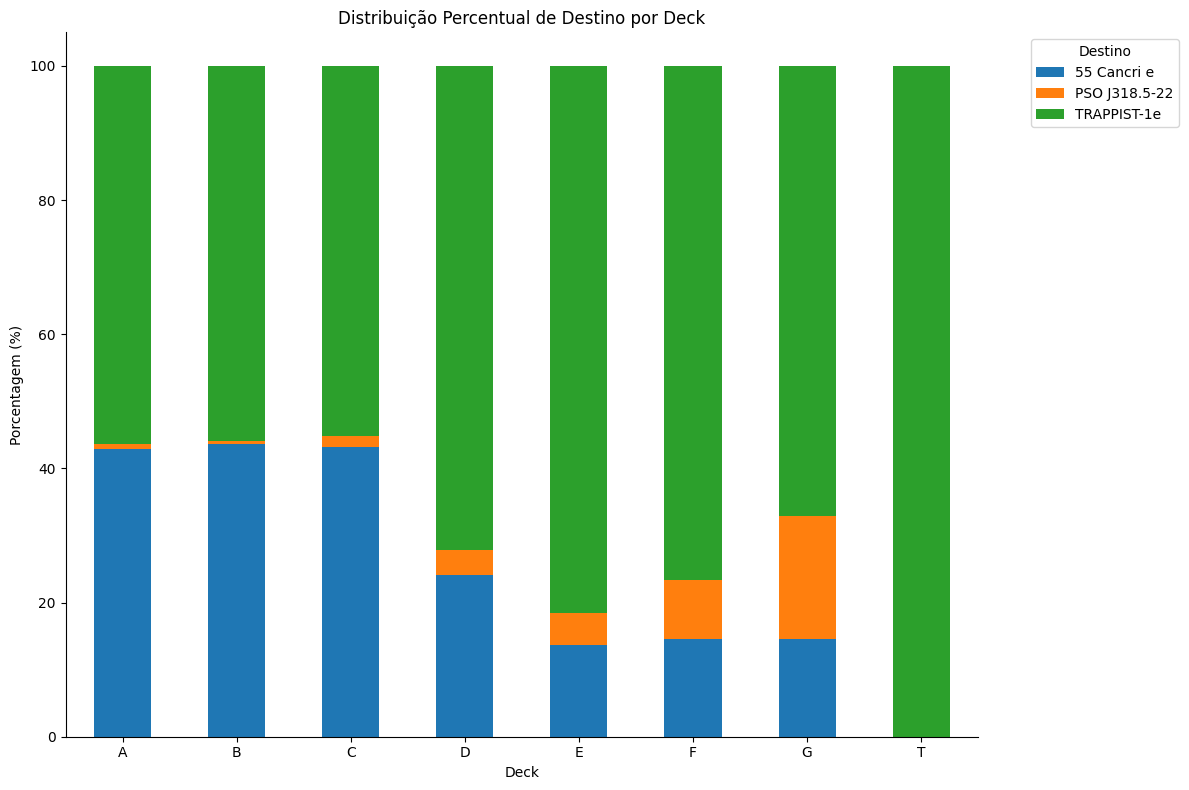

In [30]:
# prompt: plotar grafico de colunas 100% (normalizadas) de destino por deck

import matplotlib.pyplot as plt
# Calcula a contagem de cada combinação de 'Destination' e 'deck'
destination_deck_counts = df.groupby(['deck', 'Destination']).size().unstack(fill_value=0)

# Calcula a soma total de 'Destination' para cada 'deck'
destination_deck_sum = destination_deck_counts.sum(axis=1)

# Calcula as porcentagens normalizadas por 'deck'
destination_deck_normalized = destination_deck_counts.divide(destination_deck_sum, axis=0) * 100

# Plota o gráfico de barras empilhadas 100%
plt.figure(figsize=(12, 8))
destination_deck_normalized.plot(kind='bar', stacked=True, ax=plt.gca())
plt.title('Distribuição Percentual de Destino por Deck')
plt.xlabel('Deck')
plt.ylabel('Porcentagem (%)')
plt.xticks(rotation=0)
plt.legend(title='Destino', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.gca().spines[['top', 'right']].set_visible(False)
plt.tight_layout()
plt.show()

apos essa observação, presumese que um palpite educado de assumir que caso o passageiro esteja nos decks D,E,F,T tenham como destino TRAPPIST-1e

In [31]:
df.loc[df['deck'].isin(['D', 'E', 'F', 'T']) & df['Destination'].isnull(), 'Destination'] = 'TRAPPIST-1e'

print("Valores faltantes em Destination após preenchimento por deck:")
print(df['Destination'].isnull().sum())

Valores faltantes em Destination após preenchimento por deck:
82


In [32]:
mean_by_Destination = df.groupby('Destination')[quantitative_cols].mean()
sum_by_Destination = df.groupby('Destination')[quantitative_cols].sum()

print("Média das colunas quantitativas agrupada por Destination:")
print(mean_by_Destination, "\n\n")
print("soma das colunas quantitativas agrupada por Destination:")
print(sum_by_Destination)

Média das colunas quantitativas agrupada por Destination:
               RoomService   FoodCourt  ShoppingMall         Spa      VRDeck  \
Destination                                                                    
55 Cancri e     189.712222  870.155556    153.495000  470.008333  497.271667   
PSO J318.5-22    88.211055  120.091709    110.723618  115.629397  138.057789   
TRAPPIST-1e     248.007315  365.473649    183.658853  280.069659  258.992352   

                     Age  
Destination               
55 Cancri e    29.262222  
PSO J318.5-22  27.520101  
TRAPPIST-1e    28.812303   


soma das colunas quantitativas agrupada por Destination:
               RoomService  FoodCourt  ShoppingMall        Spa     VRDeck  \
Destination                                                                 
55 Cancri e       341482.0  1566280.0      276291.0   846015.0   895089.0   
PSO J318.5-22      70216.0    95593.0       88136.0    92041.0   109894.0   
TRAPPIST-1e      1491764.0  2198324.0 

não foi possivel fazer um preenchimento muito bom dos valores, mas reduziu bastante a quantidade, considerando que o valor restante se aproxima de 1% sera optado por dropar os valores nulos de deck ou preencher com um valor que representa o comrrompido ja que a falta da informação pode ser uma informação

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8693 non-null   object 
 2   CryoSleep     8693 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8611 non-null   object 
 5   Age           8693 non-null   float64
 6   VIP           8693 non-null   bool   
 7   RoomService   8693 non-null   float64
 8   FoodCourt     8693 non-null   float64
 9   ShoppingMall  8693 non-null   float64
 10  Spa           8693 non-null   float64
 11  VRDeck        8693 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
 14  Group         8693 non-null   int64  
 15  deck          8494 non-null   object 
 16  num           8494 non-null   object 
 17  side          8494 non-null   object 
dtypes: bool(2), float64(6), int6

In [34]:
for col in ('deck', 'num', 'side','Cabin', 'Destination'):
    df[col] = df[col].fillna(df[col].mode()[0])

In [35]:
df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Group,deck,num,side
0,0001_01,Europa,True,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,1,B,0,P
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,2,F,0,S
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,3,A,0,S
3,0003_02,Europa,True,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,3,A,0,S
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,4,F,1,S
